## sentiment analysis with logistic regression

### Importing needed packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### loading the dataset

In [2]:
data = pd.read_csv("datasets/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### data cleaning

In [5]:
# Check for null values
print(f"number of null values: {data.isnull().sum()}")

number of null values: review       0
sentiment    0
dtype: int64


In [6]:
# converting to lowercase and removing special characters
data['review'] = data['review'].str.lower().str.replace('[^\w\s]', '', regex=True)

In [7]:
# Replace 'positive' with 1 and 'negative' with 0
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [8]:
stop_words= set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

data['review']= data['review'].apply(preprocess)

data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


### EDA

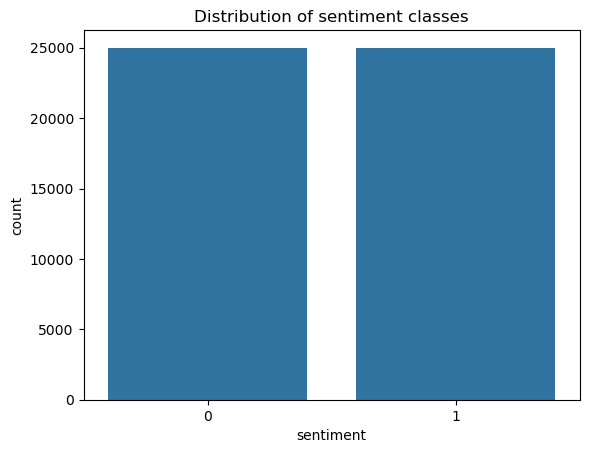

In [9]:
# Plot sentiment distribution
sns.countplot(x= 'sentiment', data=data)
plt.title("Distribution of sentiment classes")
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()

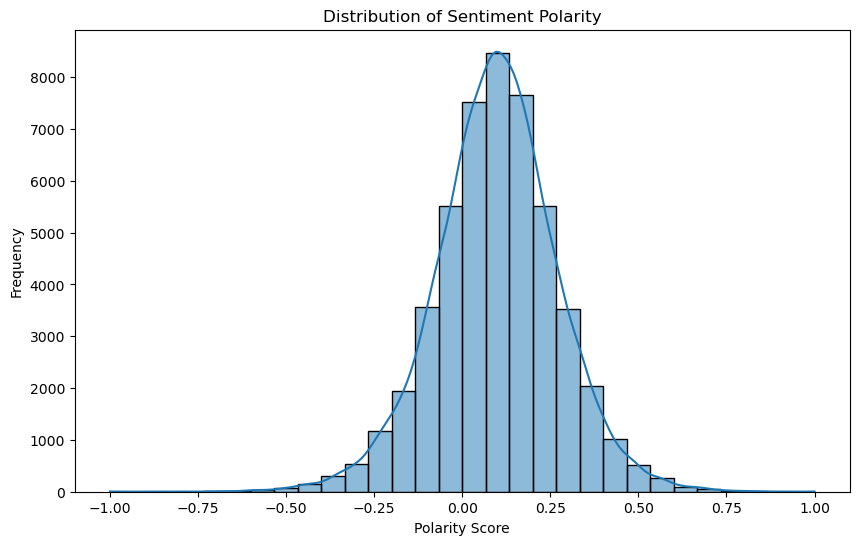

Average polarity score: 0.09731237064074243


In [10]:
from textblob import TextBlob

# Apply TextBlob for initial polarity scoring
data['polarity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of polarity scores
plt.figure(figsize=(10, 6))
sns.histplot(data['polarity'], kde=True, bins=30)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

# Print average polarity score
print("Average polarity score:", data['polarity'].mean())

### splitting the dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

### Feature Extraction

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000)
x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(x_train_vector, y_train)

y_pred = model.predict(x_test_vector)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8632
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

